<a href="https://colab.research.google.com/github/shahlanoura/Image-Classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/colabpic/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/colabpic/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create CNN model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 [==============================] - 2973s 19s/step - loss: 1.2046 - accuracy: 0.5232 - val_loss: 1.2399 - val_accuracy: 0.5224
Epoch 2/10
157/157 [==============================] - 95s 602ms/step - loss: 0.7204 - accuracy: 0.5194 - val_loss: 0.7242 - val_accuracy: 0.4721
Epoch 3/10
157/157 [==============================] - 103s 654ms/step - loss: 0.7466 - accuracy: 0.4994 - val_loss: 0.7021 - val_accuracy: 0.5045
Epoch 4/10
157/157 [==============================] - 103s 655ms/step - loss: 0.7025 - accuracy: 0.4902 - val_loss: 0.6914 - val_accuracy: 0.5103
Epoch 5/10
157/157 [==============================] - 103s 656ms/step - loss: 0.6924 - accuracy: 0.5100 - val_loss: 0.6913 - val_accuracy: 0.5145
Epoch 6/10
157/157 [==============================] - 103s 649ms/step - loss: 0.6946 - accuracy: 0.5124 - val_loss: 0.7620 - val_accuracy: 0.5287
Epoch 7/10
157/157 [==============================] - 1600s 10s/step - loss: 0.7131 - accuracy: 0.5008 - val_loss: 1.1777 - va

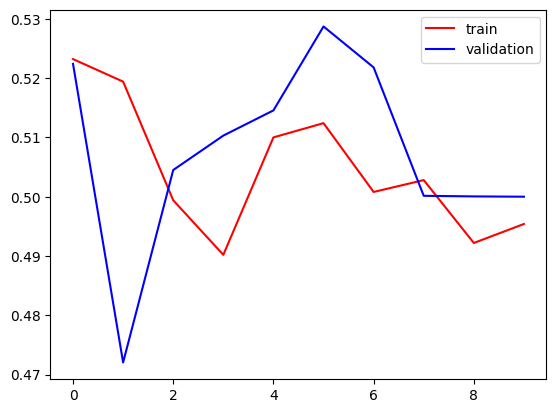

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


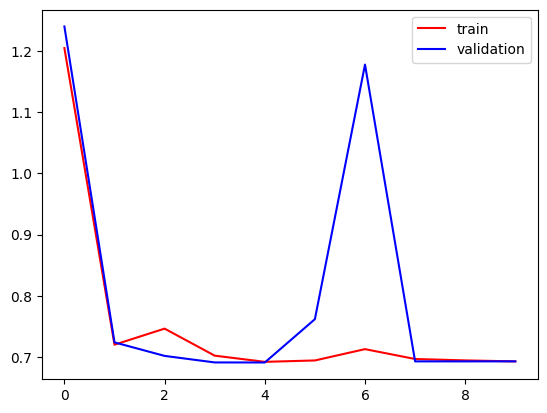

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
import cv2

In [ ]:
test_image= cv2.imread('/content/drive/MyDrive/PetImages/custom_resized_lab_480x480.webp')

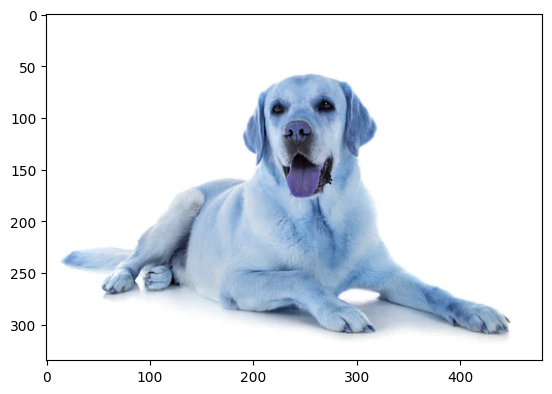

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(335, 480, 3)

In [ ]:
test_image= cv2.resize(test_image,(256,256))

In [ ]:
test_input=test_image.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0.49764997]], dtype=float32)